# Dilution problems

A common laboratory skill is to create a solution with a desired concentration by diluting a stock solution with some amount of solvent. Given a stock solution with volume $V_1$ that has a concentration of solute $C_1$, the problem is to know how much solvent to add to arrive at the desired concentration, $C_2$.

This volume can be calculated by realising that diluting the stock solution is not changing the amount of solute. The equation for this is, 
$$C_1 V_1 = C_2 V_2$$
where $C_1 V_1$ is the amount of solute in the stock solution, $C_2 V_2$ is the amount of solute in the final solution and $V_2$ is the volume of the final solution. The amount of solvent to add to the stock solution is then $V_2 - V_1$.

Q1. You have 5 ml of a stock solution of ampicillin (a penicillin antibiotic) with a concentration of 100 mg/ml. You want to make a final ampicillin solution with a concentration of 25 mg/ml. Write a Python program to calculate the volume of solvent that should be added to the 5 ml of stock solution.

In [1]:
# Dilution problem
C1 = 100.0         # Concentration of stock solution (mg/ml)
V1 = 5.0           # Volume of stock solution (ml)
C2 = 25.0          # Desired concentration of final solution (mg/ml)

V2 = C1 * V1 / C2  # Volume of final solution (ml)

V2 - V1            # Volume of solvent to be added (ml)

15.0

Q2. Write a Python program that creates a table of concentrations that would be produced by adding between 1 ml and 20 ml of solvent in steps of 1 ml to our 5 ml stock solution of ampicillin.

In [1]:
C1 = 100.0           # Concentration of stock solution (mg/ml)
V1 = 5.0             # Volume of stock solution (ml)

# Non-numpy version ==========================================
V = range(1,21);     # The volumes to add to the stock solution

# Initialise C2 and loop over values of V
C2 = []
for v in range(len(V)):
    C2.append(C1 * V1 / (V1 + V[v]))
    
    
# Numpy version ==========================================
import numpy as np

V_np = np.linspace(1,20,20)
C2_np = C1 * V1 / (V1 + V_np)



# Then print the values in a table=========================
print('C1       V1     |  C2      V2')      # Table Header
print('-------------------------------') 
for v in range(len(V)):
    print('{0:5.2f}  {1:5.2f}   |  {2:5.2f}  {3:5.2f} '
          .format(C1,V1,C2[v],V[v]+V1))

C1       V1     |  C2      V2
-------------------------------
100.00   5.00   |  83.33   6.00 
100.00   5.00   |  71.43   7.00 
100.00   5.00   |  62.50   8.00 
100.00   5.00   |  55.56   9.00 
100.00   5.00   |  50.00  10.00 
100.00   5.00   |  45.45  11.00 
100.00   5.00   |  41.67  12.00 
100.00   5.00   |  38.46  13.00 
100.00   5.00   |  35.71  14.00 
100.00   5.00   |  33.33  15.00 
100.00   5.00   |  31.25  16.00 
100.00   5.00   |  29.41  17.00 
100.00   5.00   |  27.78  18.00 
100.00   5.00   |  26.32  19.00 
100.00   5.00   |  25.00  20.00 
100.00   5.00   |  23.81  21.00 
100.00   5.00   |  22.73  22.00 
100.00   5.00   |  21.74  23.00 
100.00   5.00   |  20.83  24.00 
100.00   5.00   |  20.00  25.00 


Q3. When a serial dilution is performed, the 5 ml stock solution of ampicillin is diluted with 15 ml of solvent, but then from this 5 ml is extracted and diluted again with 15 ml of solvent. This is repeated multiple times. Modify your program from question 2 to calculate the resulting concentrations from performing up to 10 serial dilutions.

In [2]:
C1_ser = []
C1_ser.append(100.0) # Concentration of stock solution (mg/ml)
V1 = 5.0             # Volume of stock solution (ml)
V = 15;              # Volume of solvent to add (ml)
rounds = 10          # Number of rounds of dilution

# Initialise C2 and loop over rounds of dilution
C2_ser = []
for v in range(rounds):
    C2_ser.append(C1_ser[v] * V1 / (V1 + V))
    C1_ser.append(C2_ser[v])
        
    
    
# Numpy version ==========================================
import numpy as np

C1_ser_np = np.zeros(rounds+1)
C1_ser_np[0] = 100
for v in range(rounds):
    C1_ser_np[v+1] = C1_ser_np[v] * V1 / (V1 + V)

    
    
# Then print the values in a table=========================
print('Round  C1      C2')      # Table Header
for v in range(rounds):
    print('{0:2d}     {1:5.2f}  {2:5.2f}'
          .format(v,C1_ser[v],C2_ser[v]))


Round  C1      C2
 0     100.00  25.00
 1     25.00   6.25
 2      6.25   1.56
 3      1.56   0.39
 4      0.39   0.10
 5      0.10   0.02
 6      0.02   0.01
 7      0.01   0.00
 8      0.00   0.00
 9      0.00   0.00


Q4. Produce a graph that visualises the tables from question 2 and question 3. 

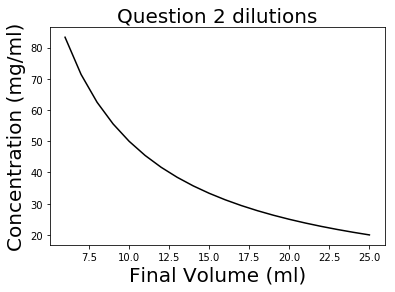

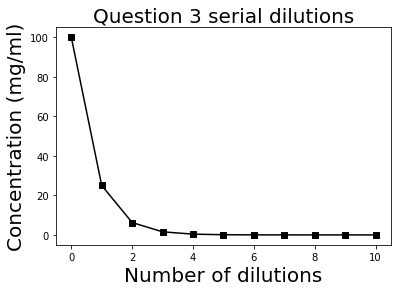

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot results for question 2
plt.figure(1)
plt.plot(V1 + V_np, C2_np, '-k')


plt.xlabel('Final Volume (ml)', fontsize=20)
plt.ylabel('Concentration (mg/ml)', fontsize=20)
plt.title('Question 2 dilutions', fontsize=20)


# Plot results for question 3
plt.figure(2)
plt.plot(np.linspace(0, rounds,rounds+1), C1_ser_np, '-sk')


plt.xlabel('Number of dilutions', fontsize=20)
plt.ylabel('Concentration (mg/ml)', fontsize=20)
plt.title('Question 3 serial dilutions', fontsize=20)

plt.show()  # Display the plots

In [7]:
C2

[83.33333333333333,
 71.42857142857143,
 62.5,
 55.55555555555556,
 50.0,
 45.45454545454545,
 41.666666666666664,
 38.46153846153846,
 35.714285714285715,
 33.333333333333336,
 31.25,
 29.41176470588235,
 27.77777777777778,
 26.31578947368421,
 25.0,
 23.80952380952381,
 22.727272727272727,
 21.73913043478261,
 20.833333333333332,
 20.0]

In [6]:
C2 + [0.2]

[83.33333333333333,
 71.42857142857143,
 62.5,
 55.55555555555556,
 50.0,
 45.45454545454545,
 41.666666666666664,
 38.46153846153846,
 35.714285714285715,
 33.333333333333336,
 31.25,
 29.41176470588235,
 27.77777777777778,
 26.31578947368421,
 25.0,
 23.80952380952381,
 22.727272727272727,
 21.73913043478261,
 20.833333333333332,
 20.0,
 0.2]